In [80]:
import pandas as pd
from datetime import datetime, timedelta

weather_df = pd.read_csv('data\Weather.csv')
# previous_data = pd.read_csv('humidity.csv')
weather_df2 = pd.read_csv('test.csv')
confirmed_df = pd.read_csv('data\TimeProvince.csv')

In [81]:
weather_df = weather_df.loc[:, ['date', 'province', 'avg_relative_humidity']]
weather_2020 = weather_df['date'].str.contains("2020")
weather_df = weather_df[weather_2020]
# previous_data = previous_data.loc[:, ['date', 'province', 'avg_relative_humidity']]
weather_df2 = weather_df2.loc[:, ['date', 'province', 'avg_relative_humidity']]

print(weather_df.head())
# print(previous_data.head())
print(weather_df2.head())

             date province  avg_relative_humidity
23375  2020-01-01    Seoul                   64.4
23376  2020-01-01    Busan                   44.0
23377  2020-01-01    Daegu                   53.3
23378  2020-01-01  Gwangju                   58.0
23379  2020-01-01  Incheon                   66.6
         date province  avg_relative_humidity
0  2020-06-01    Busan                   66.9
1  2020-06-02    Busan                   50.8
2  2020-06-03    Busan                   81.3
3  2020-06-04    Busan                   78.1
4  2020-06-05    Busan                   79.6


In [82]:
# weather_df2 = previous_data.groupby(['province', 'date'])['avg_relative_humidity'].mean()
# # weather_df2.to_csv('test.csv', mode='w', encoding='utf-8')
# weather_df2.head(100)

In [83]:
confirmed_df = confirmed_df.loc[:, ['date', 'province', 'confirmed']]
print(seoul_confirmed.head())
seoul_confirmed = confirmed_df[['date', 'confirmed']][confirmed_df['province'] == 'Seoul']
seoul_confirmed = seoul_confirmed.reset_index()

for i in range(len(seoul_confirmed)-1, 1, -1):
    seoul_confirmed['confirmed'][i] = seoul_confirmed['confirmed'][i] - seoul_confirmed['confirmed'][i-1]
    
seoul_confirmed['date'] = pd.to_datetime(seoul_confirmed['date'])
seoul_confirmed.head()

   index       date  confirmed
0      0 2020-01-20          0
1     17 2020-01-21          0
2     34 2020-01-22          0
3     51 2020-01-23          0
4     68 2020-01-24          0


C:\Users\kim4-\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,index,date,confirmed
0,0,2020-01-20,0
1,17,2020-01-21,0
2,34,2020-01-22,0
3,51,2020-01-23,0
4,68,2020-01-24,0


In [84]:
seoul_humidity = weather_df[['date', 'avg_relative_humidity']][weather_df['province'] == 'Seoul']
seoul_humidity = seoul_humidity.reset_index(drop=True)

seoul_humidity2 = weather_df2[['date', 'avg_relative_humidity']][weather_df2['province'] == 'Seoul']
seoul_humidity2 = seoul_humidity2.reset_index(drop=True)
seoul_humidity2

,date,avg_relative_humidity
0,2020-06-01,64.3
1,2020-06-02,71.0
2,2020-06-03,73.3
3,2020-06-04,81.1
4,2020-06-05,69.4
...,...,...
87,2020-08-27,84.6
88,2020-08-28,89.1
89,2020-08-29,90.1
90,2020-08-30,88.8


In [85]:
seoul_humidity['date'] = pd.to_datetime(seoul_humidity['date'])
seoul_humidity2['date'] = pd.to_datetime(seoul_humidity2['date'])
# print(seoul_humidity['date'].dtype)

seoul_humidity['date'] = seoul_humidity['date'] + pd.DateOffset(days = 5)
seoul_humidity.head()
seoul_humidity2['date'] = seoul_humidity2['date'] + pd.DateOffset(days = 5)
seoul_humidity2.head()

seoul_humidity = pd.concat([seoul_humidity, seoul_humidity2])

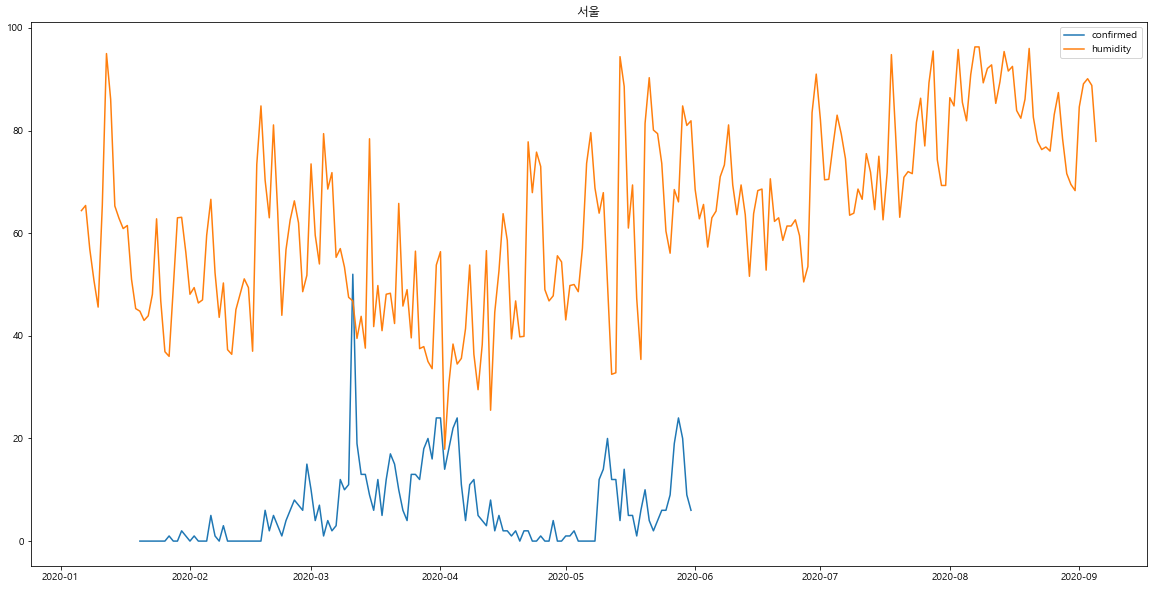

In [86]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

plt.plot(seoul_confirmed['date'], seoul_confirmed['confirmed'], label='confirmed')
plt.plot(seoul_humidity['date'], seoul_humidity['avg_relative_humidity'], label = 'humidity')
plt.title("서울")
plt.legend()
plt.show()